# 日経平均株価 15分足

### 一つ上のディレクトリをパスに追加

In [12]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [13]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.commons import (
    get_name_15min_chart,
    get_name_15min_chart_now,
    get_name_15min_chart_usd,
)

## yfinance による株価データの取得

In [14]:
code = "N225"
symbol = f"^{code}"
ticker1 = yf.Ticker(symbol)
df = ticker1.history(period="1d", interval="15m")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-10-22 09:00:00+09:00,49252.031250,49337.281250,48909.410156,48941.808594,0,0.0,0.0
2025-10-22 09:15:00+09:00,48937.269531,48997.988281,48847.210938,48957.511719,0,0.0,0.0
2025-10-22 09:30:00+09:00,48968.789062,48968.789062,48717.601562,48717.601562,0,0.0,0.0
2025-10-22 09:45:00+09:00,48711.171875,48802.718750,48637.210938,48655.250000,0,0.0,0.0
2025-10-22 10:00:00+09:00,48661.140625,48825.261719,48613.699219,48809.718750,0,0.0,0.0
2025-10-22 10:15:00+09:00,48805.289062,48899.199219,48738.429688,48891.859375,0,0.0,0.0
2025-10-22 10:30:00+09:00,48889.410156,48978.218750,48864.929688,48949.300781,0,0.0,0.0
2025-10-22 10:45:00+09:00,48950.421875,48951.480469,48859.710938,48936.988281,0,0.0,0.0
2025-10-22 11:00:00+09:00,48941.070312,49097.851562,48938.808594,49096.230469,0,0.0,0.0


## 前日終値の取得

In [15]:
# 過去一週間のデータを取得
td = datetime.timedelta(days=7)
dt_first = df.index[0]
dt_prev = dt_first - td
df_last = ticker1.history(interval="1d", start=str(dt_prev.date()))
print(df_last["Close"])
n = len(df_last)
lastclose = df_last[n - 2 : n - 1]["Close"].iloc[0]
# lastclose = 44902.27 # 9/16 終値
# 確認のため出力
df_last[n - 2 : n - 1]["Close"]

Date
2025-10-15 00:00:00+09:00    47672.671875
2025-10-16 00:00:00+09:00    48277.738281
2025-10-17 00:00:00+09:00    47582.148438
2025-10-20 00:00:00+09:00    49185.500000
2025-10-21 00:00:00+09:00    49316.058594
2025-10-22 00:00:00+09:00    49440.820312
Name: Close, dtype: float64


Date
2025-10-21 00:00:00+09:00    49316.058594
Name: Close, dtype: float64

### 当日始値 - 前日終値

In [16]:
delta_open = df.head(1)["Open"].iloc[0] - lastclose
print(f"{delta_open:+.2f}")

-64.03


## ローソク足チャート（小さいサイズ）

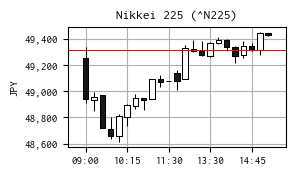

In [17]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 8

fig, ax = plt.subplots(figsize=(3, 1.8))

ax.axhline(y=lastclose, color="red", linewidth=0.75)
mpf.plot(
    df,
    type="candle",
    style="default",
    datetime_format="%H:%M",
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("JPY")
ax.grid()

if "shortName" in ticker1.info:
    ax.set_title(f"{ticker1.info['shortName']} ({symbol})")
elif "longName" in ticker1.info:
    ax.set_title(f"{ticker1.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")

plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()

## ドル円レートで換算

In [18]:
code2 = "USDJPY=X"
symbol2 = code2
ticker2 = yf.Ticker(symbol2)

### 過去２日分のドル円レートの過去データを取得

In [19]:
# 15分足で過去 2 日分のデータを取得
df_exchange = ticker2.history(period="2d", interval="15m")
df_exchange.index = df_exchange.index.tz_convert("Asia/Tokyo")
df_exchange

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-10-21 08:00:00+09:00,150.725006,150.792999,150.712006,150.789001,0,0.0,0.0
2025-10-21 08:15:00+09:00,150.781998,150.792007,150.709000,150.763000,0,0.0,0.0
2025-10-21 08:30:00+09:00,150.757996,150.796997,150.757996,150.787994,0,0.0,0.0
2025-10-21 08:45:00+09:00,150.789993,150.822006,150.722000,150.817993,0,0.0,0.0
2025-10-21 09:00:00+09:00,150.807007,150.850006,150.498001,150.600006,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-22 14:30:00+09:00,151.742004,151.806000,151.735001,151.792999,0,0.0,0.0
2025-10-22 14:45:00+09:00,151.789001,151.873001,151.787994,151.854996,0,0.0,0.0
2025-10-22 15:00:00+09:00,151.854996,151.949005,151.845001,151.899002,0,0.0,0.0


### 15分足の Close のドル円レートで一括割る

In [20]:
ser_rate = df_exchange.loc[df.index, "Close"]
ser_rate
df2 = pd.DataFrame()
df2["Open"] = df["Open"] / ser_rate
df2["High"] = df["High"] / ser_rate
df2["Low"] = df["Low"] / ser_rate
df2["Close"] = df["Close"] / ser_rate
df2

,Open,High,Low,Close
Datetime,,,,
2025-10-22 09:00:00+09:00,324.648052,325.209983,322.389643,322.603199
2025-10-22 09:15:00+09:00,322.732822,323.133251,322.138901,322.866315
2025-10-22 09:30:00+09:00,322.857646,322.857646,321.201534,321.201534
2025-10-22 09:45:00+09:00,321.254451,321.858211,320.766673,320.885642
2025-10-22 10:00:00+09:00,320.949910,322.032388,320.637005,321.929873
2025-10-22 10:15:00+09:00,321.705457,322.324476,321.264746,322.276095
2025-10-22 10:30:00+09:00,322.283289,322.868723,322.121912,322.678094
2025-10-22 10:45:00+09:00,322.585544,322.592520,321.987755,322.497016
2025-10-22 11:00:00+09:00,322.585581,323.618975,322.570674,323.608290


### 前日の終値のドル円レートから、前日の終値のドル換算

In [21]:
dt = df_exchange.head(1).index[0]
dt_last_close = pd.to_datetime(f"{str(dt.date())} 15:15:00+09:00")
print(dt_last_close)
last_close_usd = df_exchange.loc[dt_last_close, "Close"]
last_close_usd

2025-10-21 15:15:00+09:00


np.float64(151.56700134277344)

## ローソク足チャート（小さいサイズ）/ ドル換算チャート

前日終値（ドル換算） 325.3746406331561


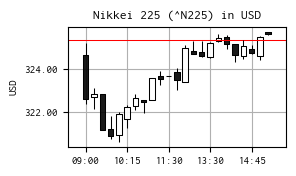

In [22]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 8

fig, ax = plt.subplots(figsize=(3, 1.8))

ax.axhline(y=lastclose / last_close_usd, color="red", linewidth=0.75)
print("前日終値（ドル換算）", lastclose / last_close_usd)
mpf.plot(
    df2,
    type="candle",
    style="default",
    datetime_format="%H:%M",
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel("USD")
ax.grid()

if "shortName" in ticker1.info:
    ax.set_title(f"{ticker1.info['shortName']} ({symbol}) in USD")
elif "longName" in ticker1.info:
    ax.set_title(f"{ticker1.info['longName']} ({symbol}) in USD")
else:
    ax.set_title(f"{symbol}")

plt.tight_layout()
plt.savefig(get_name_15min_chart_usd(code, dt_first))
plt.show()